In [6]:
#coding:utf-8
'''
BlockFilter
'''
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [20]:
block_size = 16

rows,cols = src.shape[0],src.shape[1]


src_int32 = np.int32(src.copy())
dst = np.zeros_like(src_int32)
for y in range(0,rows,block_size):
    for x in range(0,rows,block_size):
        w = min(block_size,cols - x)
        h = min(block_size,rows - y)
        
        r = 0
        g = 0
        b = 0
        i = 0
        t = w * h
        for by in range(h):
            for bx in range(w):
                r += int(src_int32[by,bx,0])
                g += int(src_int32[by,bx,1])
                b += int(src_int32[by,bx,1])
                
        r = int(r / t)
        g = int(g / t)
        b = int(b / t)
        for by in range(h):
            for bx in range(w):
                src_int32[by,bx,0] = (src_int32[by,bx,0] & 0xff000000) | r
                src_int32[by,bx,1] = (src_int32[by,bx,1] & 0xff000000) | g
                src_int32[by,bx,2] = (src_int32[by,bx,2] & 0xff000000) | b
        dst[y,x] = src_int32[h,w]
        
dst = cv2.convertScaleAbs(dst)

In [21]:
print(dst.dtype)

uint8


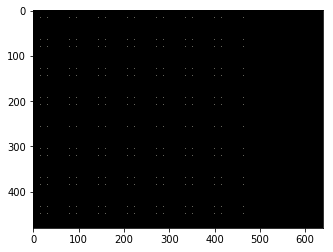

In [22]:
plt.imshow(dst)